In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv('Instagram_Data.csv')

In [7]:
import datetime as dt
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Posted']=df['Date Posted'].dt.strftime('%d-%m-%Y')
# removing time from the date posted
df['Date Posted'] = pd.to_datetime(df['Date Posted'])

In [9]:
df1 = df.drop(columns = ['Year','Month','Day','Hour','Minute','Type'])

In [35]:
df2 = df1.groupby(by=['Date Posted']).sum()

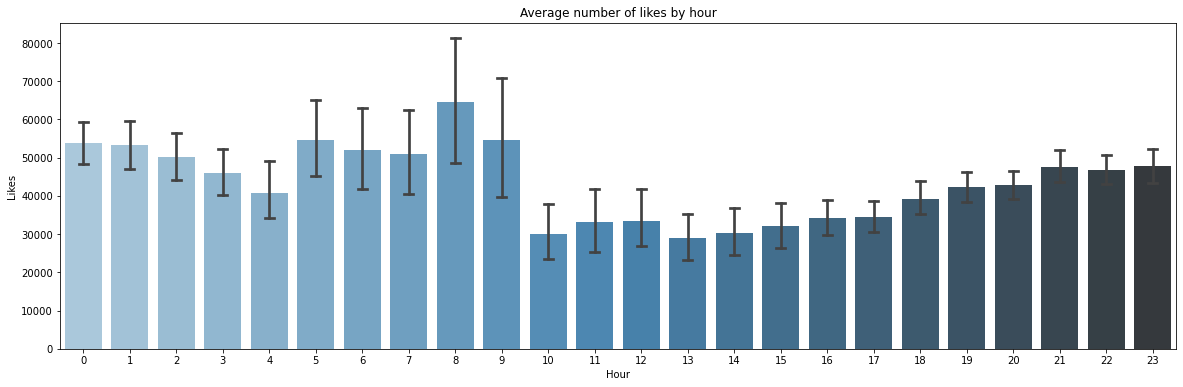

In [36]:
plt.figure(figsize=(20,6))
sns.barplot(x='Hour', y='Likes', data=df, palette='Blues_d', capsize=.2)
plt.title("Average number of likes by hour")
plt.show()

<AxesSubplot:xlabel='Date Posted'>

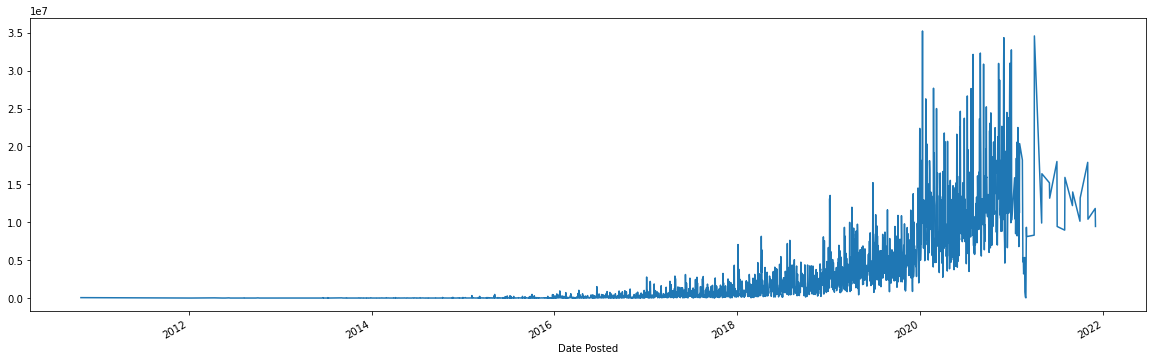

In [37]:
#Checking out if there is any trend in likes data
df2['Likes'].plot(figsize = (20,6))

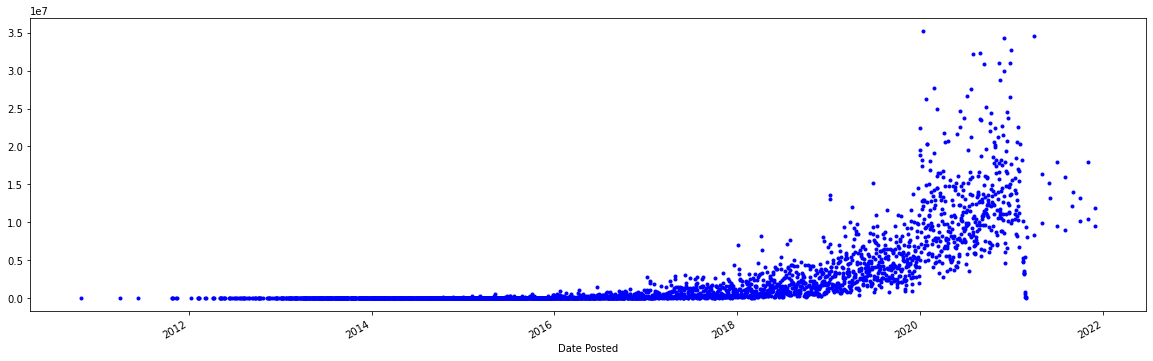

In [38]:
df2['Likes'].plot(figsize = (20,6), style = '.b');

<AxesSubplot:>

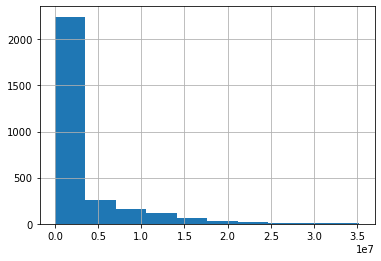

In [39]:
df2['Likes'].hist(bins = 10)

In [40]:
ts = df2['Likes']

In [41]:
roll_mean = ts.rolling(window=8, center=False).mean()
roll_std = ts.rolling(window=8, center=False).std()

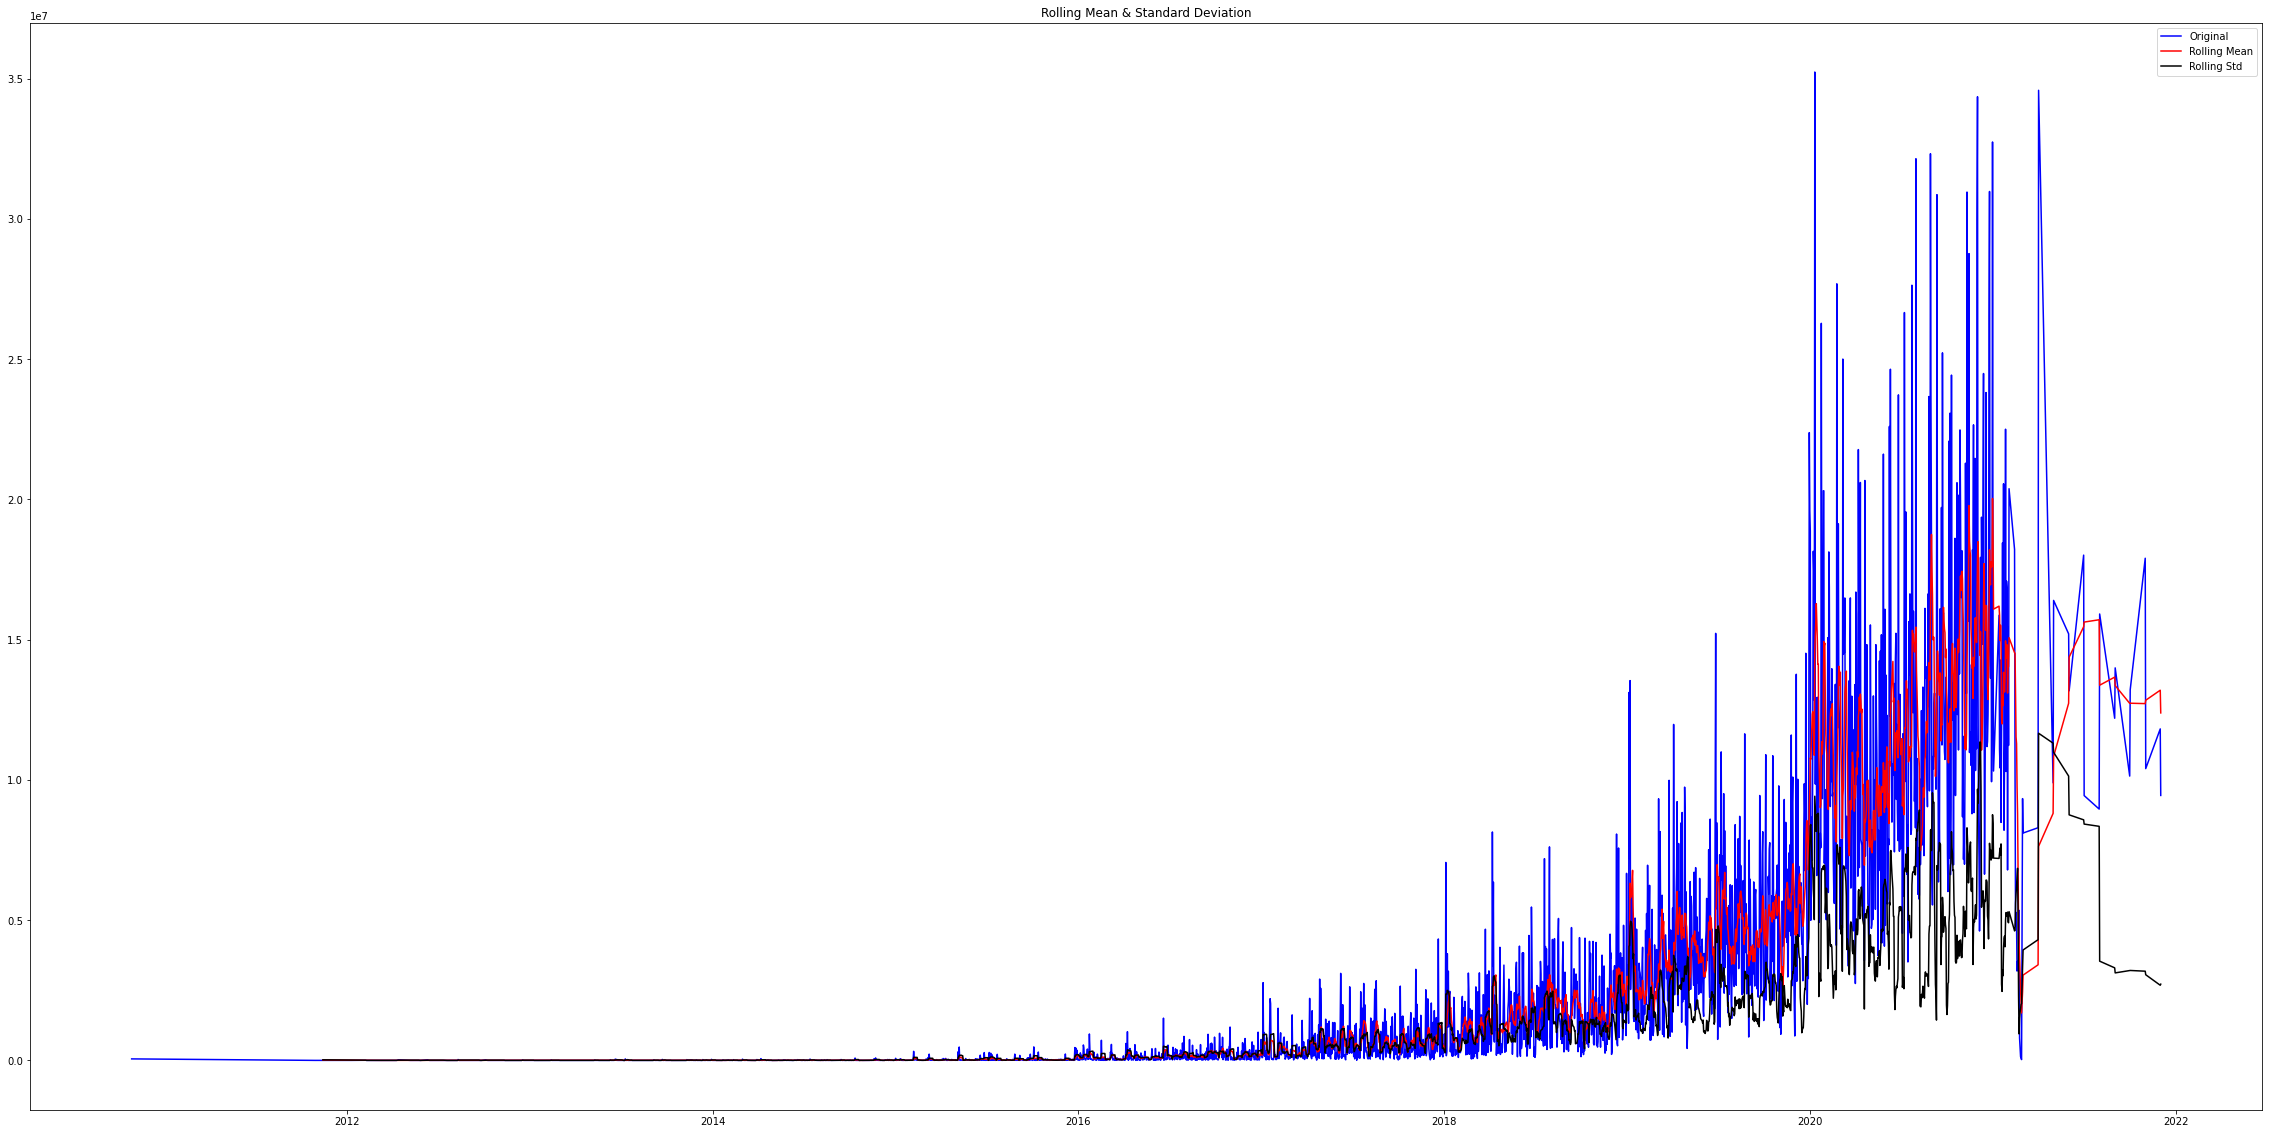

In [42]:
fig = plt.figure(figsize=(40,20))
plt.plot(ts, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts)